# Hierarchical Clustering

**Hierarchical Clustering**: Hierarchical clustering is a clustering method used to cluster data in a hierarchical structure. This method groups data points into groups in a tree-like structure using similarity or distance measures. There are two main types: ***agglomerative*** and ***divisive*** clustering.

In **agglomerative clustering**, clustering initially starts with data points and the number of clusters decreases with merging steps, while in **divisive clustering**, clustering starts with a single large cluster and the number of clusters increases with decomposition steps. Both methods work based on the similarities or distances between groups in the data set, and as a result, they create a hierarchical tree structure.

# Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option("display.width",500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [2]:
usarrest = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/USArrests.csv")
df = usarrest.copy()
df.index = df.iloc[:, 0]
df = df.iloc[:, 1:]
df.index.name = None
df.head()

Murder  Assault  UrbanPop    Rape
Alabama    13.2000      236        58 21.2000
Alaska     10.0000      263        48 44.5000
Arizona     8.1000      294        80 31.0000
Arkansas    8.8000      190        50 19.5000
California  9.0000      276        91 40.6000

# General Information About to the Dataset

In [3]:
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())
  print("######################### Qurtiles #########################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [4]:
check_df(df)

######################### Head #########################
            Murder  Assault  UrbanPop    Rape
Alabama    13.2000      236        58 21.2000
Alaska     10.0000      263        48 44.5000
Arizona     8.1000      294        80 31.0000
Arkansas    8.8000      190        50 19.5000
California  9.0000      276        91 40.6000
######################### Tail #########################
               Murder  Assault  UrbanPop    Rape
Virginia       8.5000      156        63 20.7000
Washington     4.0000      145        73 26.2000
West Virginia  5.7000       81        39  9.3000
Wisconsin      2.6000       53        66 10.8000
Wyoming        6.8000      161        60 15.6000
######################### Shape #########################
(50, 4)
######################### Types #########################
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object
######################### NA #########################
Murder      0
Assault     0
UrbanPop    0
R

# Analysis of Categorical and Numerical Variables

In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8","int64","float64"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8","int64","float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  return cat_cols, num_cols, cat_but_car

In [6]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

#Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")

Observations: 50
Variables: 4
Cat_cols: 0
Num_cols: 4
Cat_but_car: 0


In [7]:
def num_summary(dataframe, num_col, plot=False):
  quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist(bins=20)
    plt.xlabel(num_col)
    plt.title(num_col)
    plt.show(block=True)

In [8]:
def num_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in num_cols:
    num_summary(dataframe, col, plot=True)

count   50.0000
mean     7.7880
std      4.3555
min      0.8000
1%       1.4370
5%       2.1450
10%      2.5600
20%      3.3800
30%      4.7500
40%      6.0000
50%      7.2500
60%      8.6200
70%     10.1200
80%     12.1200
90%     13.3200
95%     15.4000
99%     16.7630
max     17.4000
Name: Murder, dtype: float64


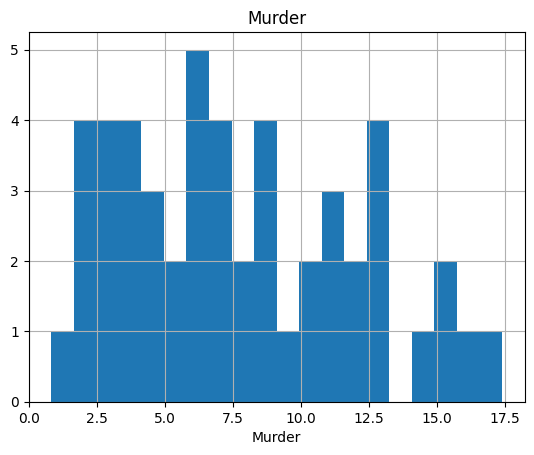

count    50.0000
mean    170.7600
std      83.3377
min      45.0000
1%       45.4900
5%       50.2500
10%      56.9000
20%      98.8000
30%     112.1000
40%     135.0000
50%     159.0000
60%     188.8000
70%     236.6000
80%     254.2000
90%     279.6000
95%     297.3000
99%     336.0200
max     337.0000
Name: Assault, dtype: float64


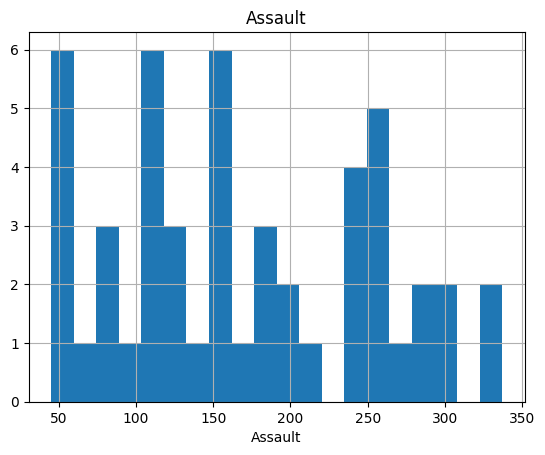

count   50.0000
mean    65.5400
std     14.4748
min     32.0000
1%      35.4300
5%      44.0000
10%     45.0000
20%     51.8000
30%     57.7000
40%     62.6000
50%     66.0000
60%     70.0000
70%     74.3000
80%     80.0000
90%     83.2000
95%     86.5500
99%     90.0200
max     91.0000
Name: UrbanPop, dtype: float64


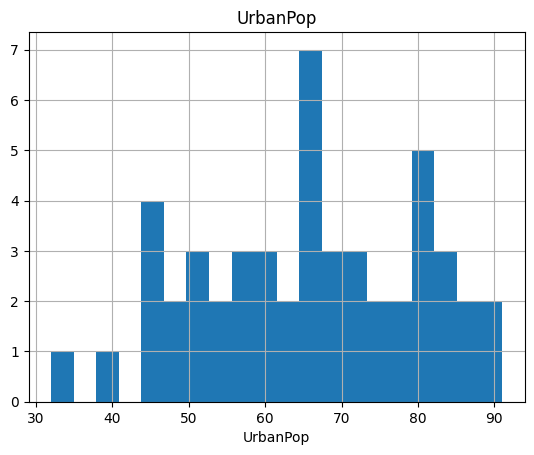

count   50.0000
mean    21.2320
std      9.3664
min      7.3000
1%       7.5450
5%       8.7500
10%     10.6700
20%     13.9200
30%     16.0100
40%     16.8600
50%     20.1000
60%     21.7200
70%     25.5900
80%     27.8800
90%     32.4000
95%     39.7450
99%     45.2650
max     46.0000
Name: Rape, dtype: float64


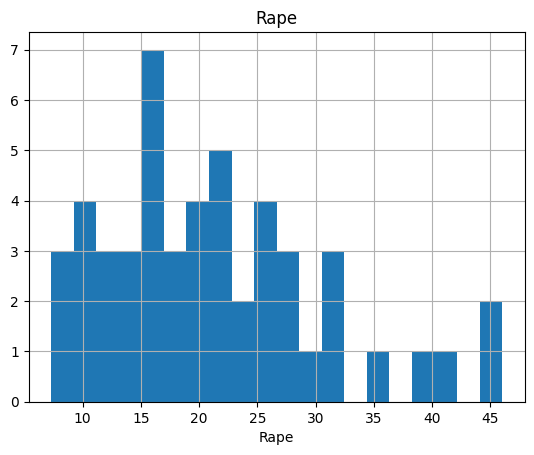

In [9]:
num_summary_df(df)

# Correlation Analysis

In [10]:
def correlated_cols(dataframe, plot=False):
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8", "int64", "float64"]]
  corr = dataframe[num_cols].corr()
  print(corr)

  if plot:
    sns.set(rc={'figure.figsize': (7,5)})
    sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
    plt.show()

          Murder  Assault  UrbanPop   Rape
Murder    1.0000   0.8019    0.0696 0.5636
Assault   0.8019   1.0000    0.2589 0.6652
UrbanPop  0.0696   0.2589    1.0000 0.4113
Rape      0.5636   0.6652    0.4113 1.0000


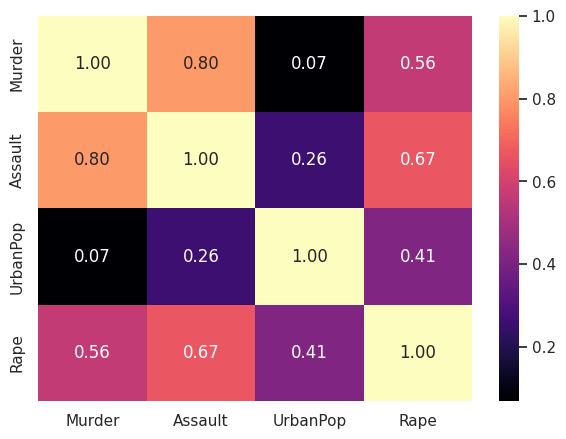

In [11]:
correlated_cols(df, plot=True)

In [12]:
def high_correlated_cols(dataframe, corr_th = 0.90, plot=False):
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8", "int64", "float64"]]
  corr = dataframe[num_cols].corr()
  corr_matrix = corr.abs()
  upper_triangular_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
  drop_list = [col for col in upper_triangular_matrix.columns if any(upper_triangular_matrix[col] > corr_th)]
  if drop_list == []:
    print("Aftre corelation analysis, we dont need to remove variables")

  if plot:
    sns.set(rc={'figure.figsize': (7,5)})
    sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
    plt.show()

  return drop_list

Aftre corelation analysis, we dont need to remove variables


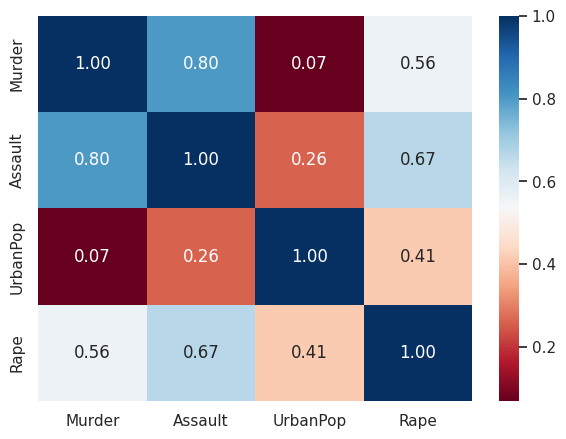

In [13]:
drop_list = high_correlated_cols(df, plot=True)

# Missing Value Analysis

In [14]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [15]:
def missing_value_table(dataframe, na_names=False):
  na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
  n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
  ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
  missing_df = pd.concat([n_miss, np.round(ratio,2)], axis=1, keys=["n_miss", "ratio"])
  print(missing_df)

  if na_names:
    print(25*"#", "NA Columns", 25*"#")
    return na_columns

In [16]:
na_columns = missing_value_table(df, na_names=True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []
######################### NA Columns #########################


In [17]:
def fill_na_with_median(dataframe):
  dataframe = dataframe.apply(lambda x: x.fillna(x.median()) if x.dtype not in ["category", "object", "bool"] else x, axis=0)
  return dataframe

In [18]:
df = fill_na_with_median(df)

In [19]:
df.isnull().sum().sum()

0

# Outlier Analysis

In [20]:
def outlier_thresholds(dataframe,col_name,q1=0.10,q3=0.90):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquartile_range = quartile3 - quartile1
  low_limit = quartile1 - 1.5 * interquartile_range
  up_limit = quartile3 + 1.5 * interquartile_range
  return low_limit,up_limit

In [21]:
def check_outlier(dataframe, col_name):
  low_limit,up_limit = outlier_thresholds(dataframe,col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

In [22]:
def replace_with_thresholds(dataframe, col_name):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
  dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit

In [23]:
def solve_outliers(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
  for col in num_cols:
    if col:
      print(col, check_outlier(dataframe, col))
      if check_outlier(dataframe, col):
        replace_with_thresholds(dataframe, col)

In [24]:
solve_outliers(df)

Murder False
Assault False
UrbanPop False
Rape False


In [25]:
def check_outlier_df(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
  for col in num_cols:
    if col:
      print(col, check_outlier(dataframe, col))

In [26]:
check_outlier_df(df)

Murder False
Assault False
UrbanPop False
Rape False


# Create a Hierarchical Clustering Model

In [41]:
def Create_Dendrogram(dataframe, linkage_param="complete", p=10):
  hc_linkage = linkage(df, linkage_param)
  plt.figure(figsize=(15, 10))
  plt.title("Hierarchical Clustering - Dendrogram")
  plt.xlabel("Index")
  plt.ylabel("Distance")
  dendrogram(hc_linkage, leaf_font_size=10);
  if p:
    plt.figure(figsize=(15, 10))
    plt.title("Hierarchical Clustering - Dendrogram")
    plt.xlabel("Index")
    plt.ylabel("Distance")
    dendrogram(hc_linkage, truncate_mode="lastp", p=p, show_contracted=True);


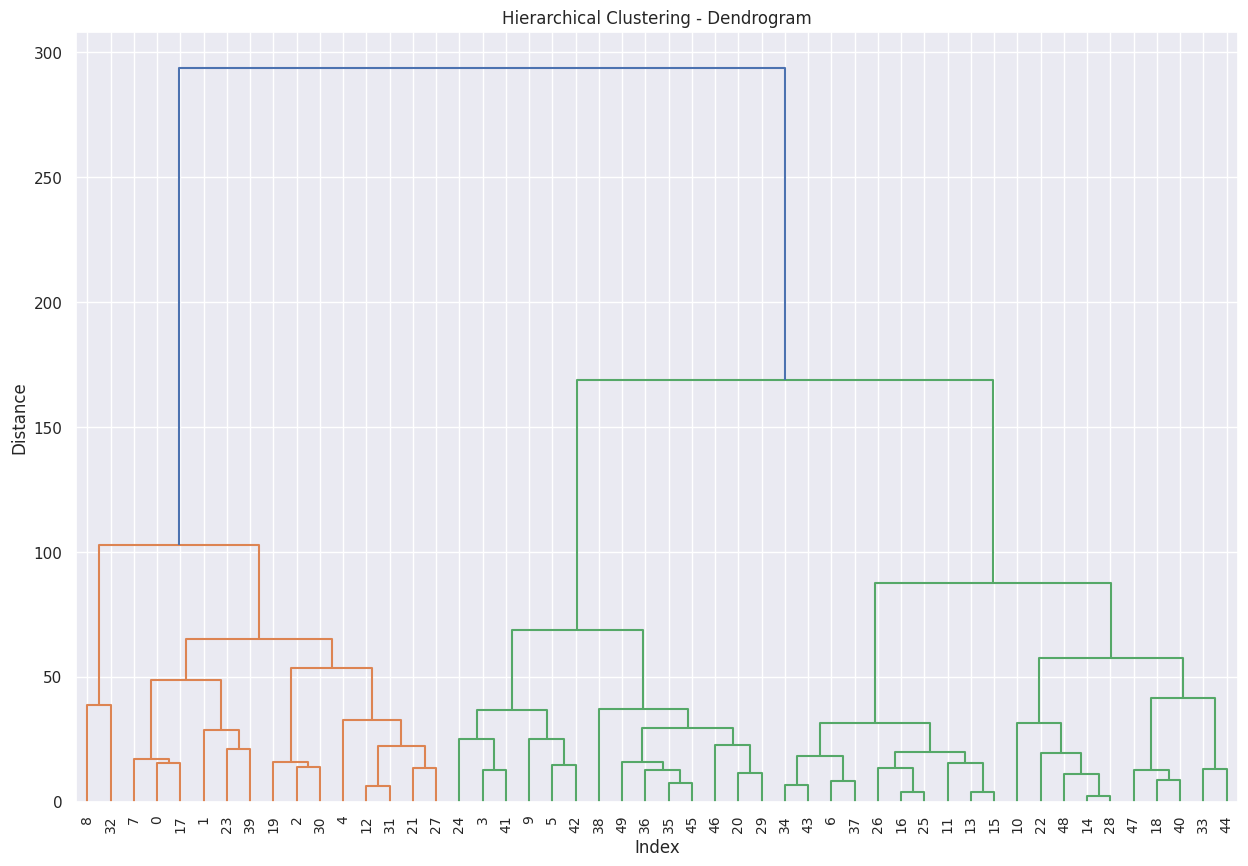

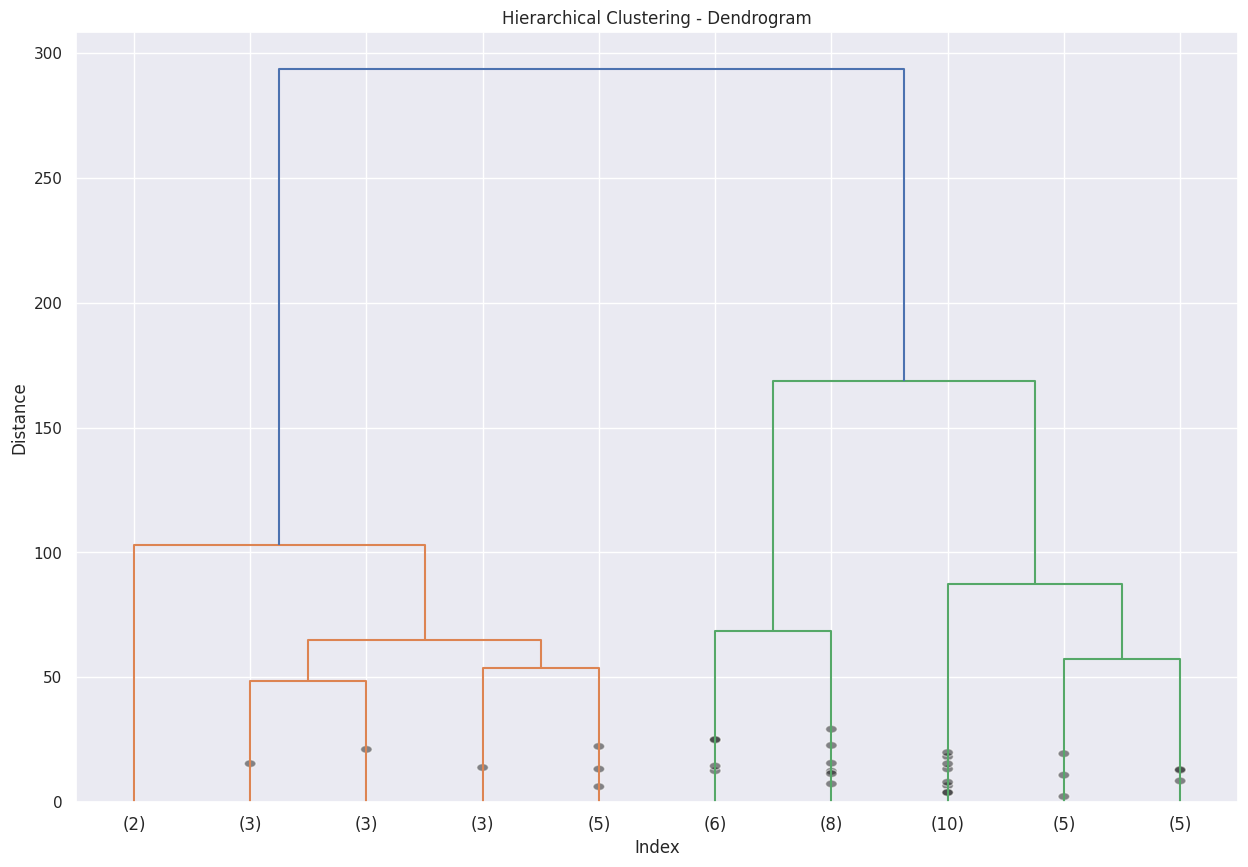

In [42]:
Create_Dendrogram(df)

In [39]:
def Agglomerative_Clustering(dataframe, n_clusters, distance="euclidean", linkage_param="ward", results=False, save_results=False):
  cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity=distance, linkage=linkage_param)
  cluster_labels = cluster.fit_predict(dataframe)
  if results:
    print("########################### Number of Clusters ###########################")
    print("Number of Clusters: ", n_clusters)
    print("########################### Cluster Labels ###########################")
    print(cluster_labels + 1)

  if save_results:
    cluster_df = pd.DataFrame({"Stats": dataframe.index, "Cluster_Number": cluster_labels + 1})
    cluster_df.to_csv("cluster_df.csv")
    dataframe["Cluster_Number"] = cluster_labels + 1
    dataframe.to_csv("new_df.csv")


In [40]:
Agglomerative_Clustering(df, n_clusters=4, results=True, save_results=True)

########################### Number of Clusters ###########################
Number of Clusters:  4
########################### Cluster Labels ###########################
[1 1 1 3 1 3 4 1 1 3 2 4 1 4 2 4 4 1 2 1 3 1 2 1 3 4 4 1 2 3 1 1 1 2 4 3 3
 4 3 1 2 3 3 4 2 3 3 2 2 3]


In [43]:
def Hierarchical_Clustering(dataframe, n_clusters, linkage_param="complete", p=10, distance="euclidean", results=False, save_results=False):
  hc_linkage = linkage(df, linkage_param)
  plt.figure(figsize=(15, 10))
  plt.title("Hierarchical Clustering - Dendrogram")
  plt.xlabel("Index")
  plt.ylabel("Distance")
  dendrogram(hc_linkage, leaf_font_size=10);

  cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity=distance, linkage=linkage_param)
  cluster_labels = cluster.fit_predict(dataframe)

  if p:
    plt.figure(figsize=(15, 10))
    plt.title("Hierarchical Clustering - Dendrogram")
    plt.xlabel("Index")
    plt.ylabel("Distance")
    dendrogram(hc_linkage, truncate_mode="lastp", p=p, show_contracted=True);

  if results:
    print("########################### Number of Clusters ###########################")
    print("Number of Clusters: ", n_clusters)
    print("########################### Cluster Labels ###########################")
    print(cluster_labels + 1)

  if save_results:
    cluster_df = pd.DataFrame({"Stats": dataframe.index, "Cluster_Number": cluster_labels + 1})
    cluster_df.to_csv("cluster_df.csv")
    dataframe["Cluster_Number"] = cluster_labels + 1
    dataframe.to_csv("new_df.csv")

########################### Number of Clusters ###########################
Number of Clusters:  4
########################### Cluster Labels ###########################
[2 2 2 3 2 3 1 2 4 3 1 1 2 1 1 1 1 2 1 2 3 2 1 2 3 1 1 2 1 3 2 2 4 1 1 3 3
 1 3 2 1 3 3 1 1 3 3 1 1 3]


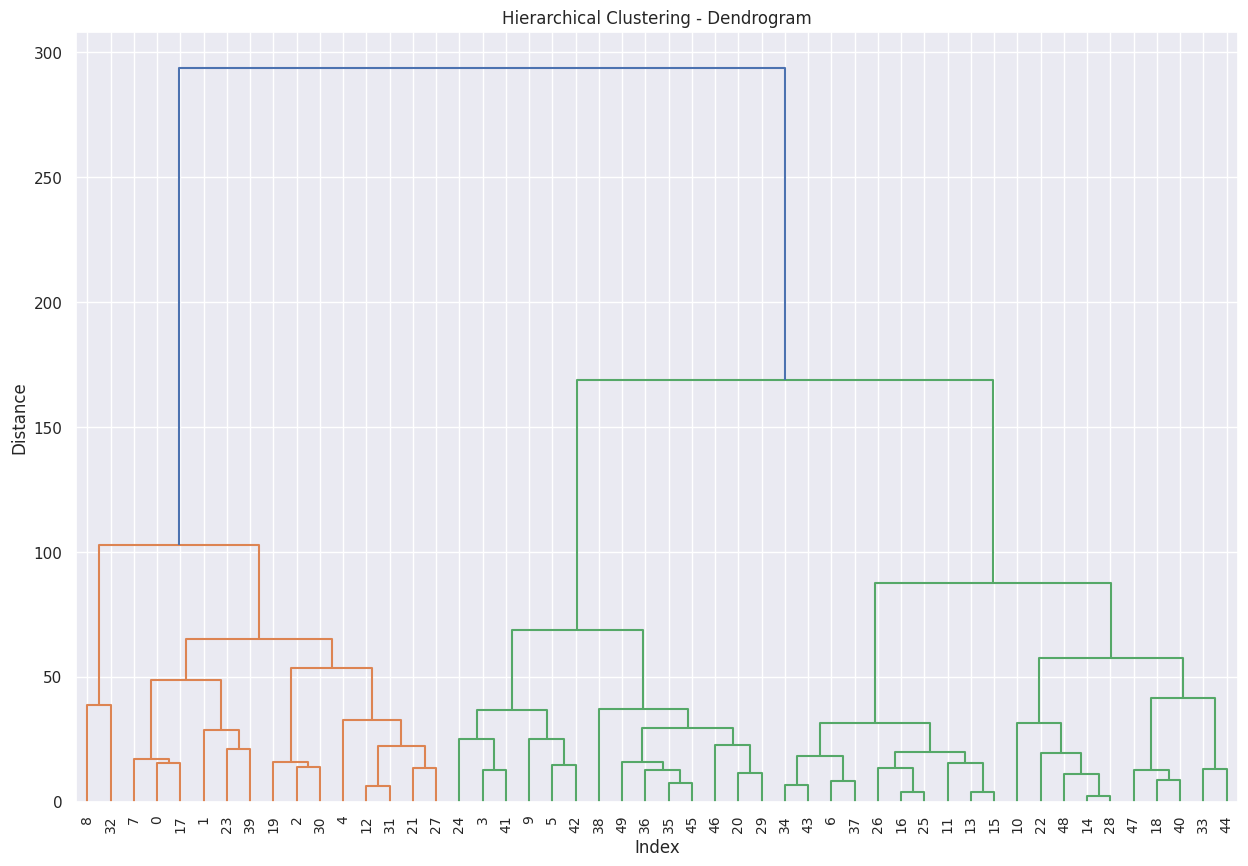

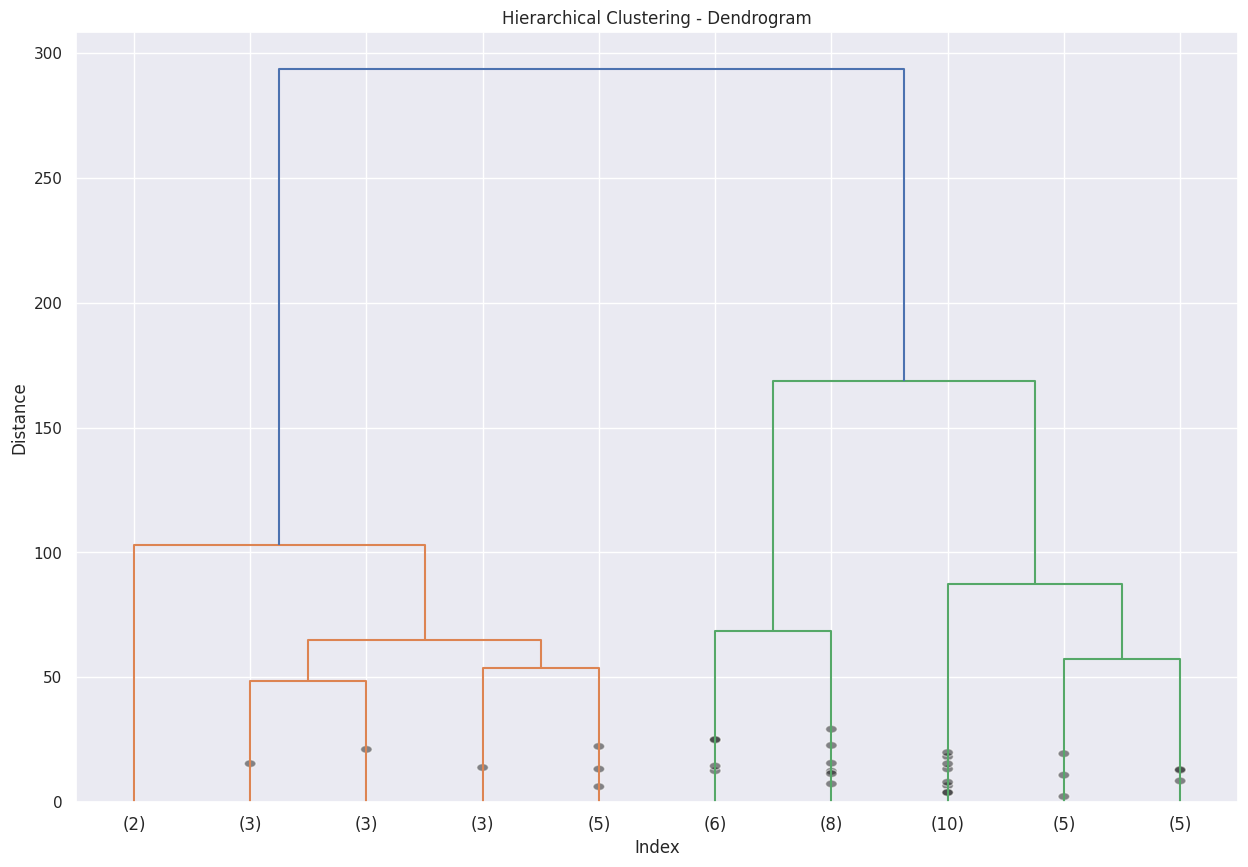

In [44]:
Hierarchical_Clustering(df, n_clusters=4, results=True, save_results=True)